In [57]:
# Dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import datetime

In [29]:
# Store filepath in a variable
weather_file= "Data/CentralPark15-17.csv"
flu_incident_file= "Data/ILINet_2015_2017.csv"


In [30]:
# Read our Data file with the pandas library
# Not every CSV requires an encoding, but be aware this can come up
weather_file_df = pd.read_csv(weather_file, encoding = "ISO-8859-1")


In [31]:
weather_file_df.head()

,num,STATION,NAME,DATE,PRCP,SNOW,TAVG,TMAX,TMIN,YEAR,WEEK,WkStart,WkEnd,Mo_of_yr,MoY
0,3,USW00094728,"NY CITY CENTRAL PARK, NY US",2015-10,3.91,0.0,58.0,65.4,50.7,2015,40,10/5/2015,10/11/2015,October,10/1/2015
1,3,USW00094728,"NY CITY CENTRAL PARK, NY US",2015-10,3.91,0.0,58.0,65.4,50.7,2015,41,10/12/2015,10/18/2015,October,10/1/2015
2,3,USW00094728,"NY CITY CENTRAL PARK, NY US",2015-10,3.91,0.0,58.0,65.4,50.7,2015,42,10/19/2015,10/25/2015,October,10/1/2015
3,3,USW00094728,"NY CITY CENTRAL PARK, NY US",2015-10,3.91,0.0,58.0,65.4,50.7,2015,43,10/26/2015,11/1/2015,October,10/1/2015
4,4,USW00094728,"NY CITY CENTRAL PARK, NY US",2015-11,2.02,0.0,52.8,59.3,46.3,2015,44,11/2/2015,11/8/2015,November,11/1/2015


In [32]:
# organized_df = training_data[["Name","Trainer","Weight","Membership(Days)"]]
# organized_df.head()
weath_summ_df = weather_file_df[["PRCP", "SNOW", "TAVG", "WkStart"]]
weath_summ_df.head()

,PRCP,SNOW,TAVG,WkStart
0,3.91,0.0,58.0,10/5/2015
1,3.91,0.0,58.0,10/12/2015
2,3.91,0.0,58.0,10/19/2015
3,3.91,0.0,58.0,10/26/2015
4,2.02,0.0,52.8,11/2/2015


In [33]:
incident_file_df = pd.read_csv(flu_incident_file, encoding = "ISO-8859-1")

In [34]:
incident_file_df

,REGION TYPE,REGION,YEAR,WEEK,WkStart,WkEnd,Mo_of_yr,MoY,% WEIGHTED ILI,%UNWEIGHTED ILI,AGE 0-4,AGE 25-49,AGE 25-64,AGE 5-24,AGE 50-64,AGE 65,ILITOTAL,NUM. OF PROVIDERS,TOTAL PATIENTS
0,States,New York,2015,40,10/5/2015,10/11/2015,October,10/1/2015,X,0.588433,X,X,X,X,X,X,70,80,11896
1,States,New York,2015,41,10/12/2015,10/18/2015,October,10/1/2015,X,0.557203,X,X,X,X,X,X,62,80,11127
2,States,New York,2015,42,10/19/2015,10/25/2015,October,10/1/2015,X,0.859620,X,X,X,X,X,X,115,82,13378
3,States,New York,2015,43,10/26/2015,11/1/2015,October,10/1/2015,X,0.816171,X,X,X,X,X,X,107,83,13110
4,States,New York,2015,44,11/2/2015,11/8/2015,November,11/1/2015,X,0.655665,X,X,X,X,X,X,89,84,13574
5,States,New York,2015,45,11/9/2015,11/15/2015,November,11/1/2015,X,0.723665,X,X,X,X,X,X,97,85,13404
6,States,New York,2015,46,11/16/2015,11/22/2015,November,11/1/2015,X,1.184980,X,X,X,X,X,X,159,82,13418
7,States,New York,2015,47,11/23/2015,11/29/2015,November,11/1/2015,X,0.978670,X,X,X,X,X,X,78,83,7970
8,States,New York,2015,48,11/30/2015,12/6/2015,December,12/1/2015,X,1.181800,X,X,X,X,X,X,141,80,11931
9,States,New York,2015,49,12/7/2015,12/13/2015,December,12/1/2015,X,1.513350,X,X,X,X,X,X,178,77,11762


In [35]:
inc_summ_df = incident_file_df[["WkStart","ILITOTAL" ]]
inc_summ_df.head()

,WkStart,ILITOTAL
0,10/5/2015,70
1,10/12/2015,62
2,10/19/2015,115
3,10/26/2015,107
4,11/2/2015,89


In [36]:
# merge_table = pd.merge(info_pd, items_pd, on="customer_id")
inc_weath_df = pd.merge(inc_summ_df, weath_summ_df, on ="WkStart")
inc_weath_df.head()

,WkStart,ILITOTAL,PRCP,SNOW,TAVG
0,10/5/2015,70,3.91,0.0,58.0
1,10/12/2015,62,3.91,0.0,58.0
2,10/19/2015,115,3.91,0.0,58.0
3,10/26/2015,107,3.91,0.0,58.0
4,11/2/2015,89,2.02,0.0,52.8


In [37]:
x_axis =  np.arange(len(inc_weath_df))
x_axis

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
       85])

In [38]:
# xticks(arange(len(inc_weath_df)),inc_weath_df["WkStart"], rotation=17)
# Avearge weather temp & Precipitation
points_F = inc_weath_df["TAVG"]
prcp_total = inc_weath_df["PRCP"]

#Flu outbreak totals
inc_vol = inc_weath_df["ILITOTAL"]

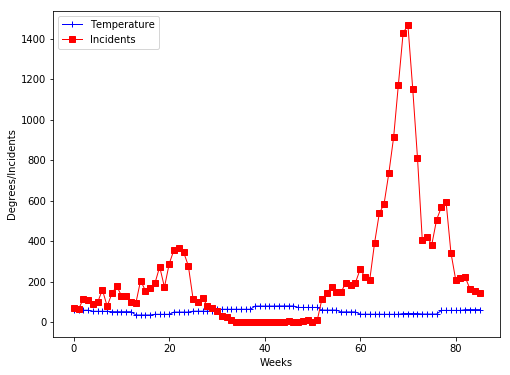

In [39]:
# Create a handle for each plot
temperature, = plt.plot(x_axis, points_F, marker="+",color="blue", linewidth=1, label="Temperature")
incidents, = plt.plot(x_axis, inc_vol, marker="s", color="Red", linewidth=1, label="Incidents")
# Set our legend to where the chart thinks is best
plt.legend(handles=[temperature, incidents], loc="best")
# Create labels for the X and Y axis
plt.xlabel("Weeks")
plt.ylabel("Degrees/Incidents")
plt.show()

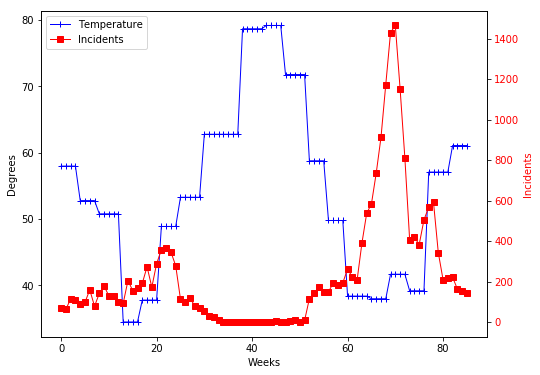

In [41]:
plt.clf()
fig = plt.figure(figsize=(8,6))
ax1 = fig.add_subplot(111)
plot1, = ax1.plot(x_axis, points_F, marker="+", color="blue", linewidth=1, label="Temperature")
ax1.set_xlabel("Weeks")
ax1.set_ylabel('Degrees')

ax2 = ax1.twinx()
plot2, = ax2.plot(x_axis, inc_vol, marker="s", color="Red", linewidth=1, label="Incidents")
ax2.set_ylabel('Incidents', color='r')
for tl in ax2.get_yticklabels():
    tl.set_color('r')
plt.legend(handles=[plot1, plot2], loc="best")
#plt.savefig('Incident_Weather2scales.png')
plt.show()

In [14]:
#Clear the frame so that a new plot can be plotted properly
plt.clf()

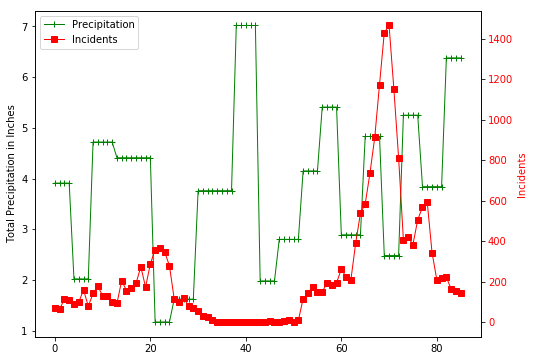

In [15]:
fig = plt.figure(figsize=(8,6))
ax1 = fig.add_subplot(111)
plot3, = ax1.plot(x_axis, prcp_total, marker="+", color="Green", linewidth=1, label="Precipitation")
ax1.set_ylabel('Total Precipitation in Inches')

ax2 = ax1.twinx()
plot4, = ax2.plot(x_axis, inc_vol, marker="s", color="Red", linewidth=1, label="Incidents")
ax2.set_ylabel('Incidents', color='r')
for tl in ax2.get_yticklabels():
    tl.set_color('r')
plt.legend(handles=[plot3, plot4], loc="best")
plt.savefig('PrecipitationVSFluOutbreak.png')
plt.show()

In [16]:
# Store filepath in a variable
flu_vacc_file1= "Data/NYVacc2015-16CalcData.csv"
flu_vacc_file2= "Data/NYVacc2016-17CalcData.csv"
vacc15_16 = pd.read_csv(flu_vacc_file1)
vacc16_17 = pd.read_csv(flu_vacc_file2)
vacc16_17.head()

,Month,Percentage,Sample_Size
0,Jul 2016,0.0045,46338
1,Aug 2016,0.0211,46338
2,Sep 2016,0.0998,46338
3,Oct 2016,0.2633,46338
4,Nov 2016,0.3526,46338


In [17]:
vacctotal = [vacc15_16, vacc16_17]
mergetotal = pd.concat(vacctotal)
mergetotal.head()
#Calculate the percent change in vaccinations from month to month.
mergetotal['Change']=mergetotal.Percentage.pct_change()
#mergetotal.to_csv("NYVacc2015-17.csv")

In [18]:
#Read in new vacc file with added column
flu_vacc_file4= "Data/NYVacc2015-17.csv"
vacc15_17 = pd.read_csv(flu_vacc_file4)
vacc15_17.head()

,Month_Short,Month,Percentage,Sample_Size,Change
0,15-Jul,7/1/2015,0.0053,50801,NaN
1,15-Aug,8/1/2015,0.0181,50801,2.415094
2,15-Sep,9/1/2015,0.0912,50801,4.038674
3,15-Oct,10/1/2015,0.2596,50801,1.846491
4,15-Nov,11/1/2015,0.3578,50801,0.378274


In [19]:
#Convert "Month" column to same date-time format as the other so they can be merged
vacc15_17['Month'] = pd.to_datetime(vacc15_17['Month'], format="%m/%d/%Y")
vacc15_17.head()

,Month_Short,Month,Percentage,Sample_Size,Change
0,15-Jul,2015-07-01,0.0053,50801,NaN
1,15-Aug,2015-08-01,0.0181,50801,2.415094
2,15-Sep,2015-09-01,0.0912,50801,4.038674
3,15-Oct,2015-10-01,0.2596,50801,1.846491
4,15-Nov,2015-11-01,0.3578,50801,0.378274


In [20]:
#Read in FLu Incidents file and check for accuracy
flu_incid= "Data/ILINet_2015_2017.csv"
fluout = pd.read_csv(flu_incid)
fluout.head()

,REGION TYPE,REGION,YEAR,WEEK,WkStart,WkEnd,Mo_of_yr,MoY,% WEIGHTED ILI,%UNWEIGHTED ILI,AGE 0-4,AGE 25-49,AGE 25-64,AGE 5-24,AGE 50-64,AGE 65,ILITOTAL,NUM. OF PROVIDERS,TOTAL PATIENTS
0,States,New York,2015,40,10/5/2015,10/11/2015,October,10/1/2015,X,0.588433,X,X,X,X,X,X,70,80,11896
1,States,New York,2015,41,10/12/2015,10/18/2015,October,10/1/2015,X,0.557203,X,X,X,X,X,X,62,80,11127
2,States,New York,2015,42,10/19/2015,10/25/2015,October,10/1/2015,X,0.859620,X,X,X,X,X,X,115,82,13378
3,States,New York,2015,43,10/26/2015,11/1/2015,October,10/1/2015,X,0.816171,X,X,X,X,X,X,107,83,13110
4,States,New York,2015,44,11/2/2015,11/8/2015,November,11/1/2015,X,0.655665,X,X,X,X,X,X,89,84,13574


In [21]:
#Extract useful information from CSV file and put into new dataframe.
ili_groupby = fluout.groupby(['MoY'])
sum_ili = pd.DataFrame(ili_groupby['ILITOTAL'].sum())
sum_ili.index = sum_ili.index.to_datetime()
sorted_ili = sum_ili.sort_index(ascending=True)

C:\Users\BenG\Anaconda3\envs\PythonData\lib\site-packages\ipykernel\__main__.py:4: FutureWarning: to_datetime is deprecated. Use pd.to_datetime(...)


In [61]:
#Reset the index of the new sorted dataframe, change the column name, and check it out
sortedILI =sorted_ili.reset_index()
sortedILI = sortedILI.rename(columns={"index": "Month"})
sortedILI.dtypes


Month       datetime64[ns]
ILITOTAL             int64
dtype: object

In [67]:
#sortedILI['YEAR']=sortedILI['Month'].year
sortedILI
sortedILI['YEAR'], sortedILI['MONTH'] = sortedILI['Month'].dt.year, sortedILI['Month'].dt.month
sortedILI.head()

,Month,ILITOTAL,YEAR,MONTH
0,2015-10-01,354,2015,10
1,2015-11-01,423,2015,11
2,2015-12-01,673,2015,12
3,2016-01-01,619,2016,1
4,2016-02-01,924,2016,2


In [23]:
#Merge the two dataframes into one (Be one with the force Luke!)
merge_table = pd.merge(vacc15_17, sortedILI, on="Month")
#merge_table
perc15_16 = merge_table.loc[merge_table["Sample_Size"] ==50801,:]
perc15_16

perc16_17 = merge_table.loc[merge_table["Sample_Size"] ==46338,:]
perc16_17

,Month_Short,Month,Percentage,Sample_Size,Change,ILITOTAL
8,16-Jul,2016-07-01,0.0045,46338,NaN,3
9,16-Aug,2016-08-01,0.0211,46338,3.688889,6
10,16-Sep,2016-09-01,0.0998,46338,3.729858,22
11,16-Oct,2016-10-01,0.2633,46338,1.638277,577
12,16-Nov,2016-11-01,0.3526,46338,0.339157,718
13,16-Dec,2016-12-01,0.3915,46338,0.110323,1618
14,17-Jan,2017-01-01,0.4281,46338,0.093487,3407
15,17-Feb,2017-02-01,0.4466,46338,0.043214,4861
16,17-Mar,2017-03-01,0.4539,46338,0.016346,1714
17,17-Apr,2017-04-01,0.4582,46338,0.009473,1928


In [24]:
#Create a variable for the x-axis and variables for y axis data 
x_axis = np.arange(len(merge_table))
x_axis
#perc2015 =
percchange = merge_table["Percentage"]
inctotals = merge_table["ILITOTAL"]
monthinfo = merge_table["Month"]
monthinfo.head()
percchange

0     0.2596
1     0.3578
2     0.3922
3     0.4191
4     0.4353
5     0.4468
6     0.4536
7     0.4544
8     0.0045
9     0.0211
10    0.0998
11    0.2633
12    0.3526
13    0.3915
14    0.4281
15    0.4466
16    0.4539
17    0.4582
18    0.4626
Name: Percentage, dtype: float64

C:\Users\BenG\Anaconda3\envs\PythonData\lib\site-packages\matplotlib\cbook\deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


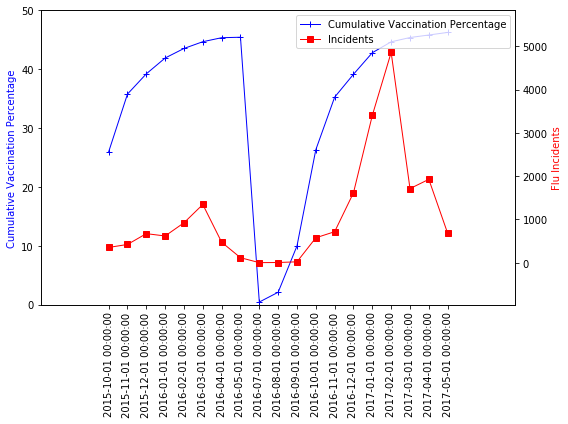

In [25]:
plt.clf()
fig = plt.figure(figsize=(8, 6))
plt.xticks(x_axis, monthinfo, rotation= 'vertical')
ax1 = fig.add_subplot(111)
plot1, = ax1.plot(x_axis, (percchange*100), marker="+", color="blue", linewidth=1, label="Cumulative Vaccination Percentage")
ax1.set_ylabel('Cumulative Vaccination Percentage', color='b')
plt.ylim((0,50))

ax2 = ax1.twinx()
plot2, = ax2.plot(x_axis, inctotals, marker="s", color="Red", linewidth=1, label="Incidents")
ax2.set_ylabel('Flu Incidents', color='r')
plt.legend(handles=[plot1, plot2], loc="best")
#for tl in ax2.get_yticklabels():
 #   tl.set_color('r')
# Pad margins so that markers don't get clipped by the axes
plt.margins(0.2)
# Tweak spacing to prevent clipping of tick-labels
plt.subplots_adjust(bottom=0.15)

#Save Plot and Display
plt.tight_layout()
plt.savefig("VaccineVSOutbreak.png")
plt.show()

In [48]:
airCsv1 = 'Data/2017_AirTravel_T_T100D_MARKET_ALL_CARRIER.csv'
airCsv2 = 'Data/2016_AirTravel_T100D_MARKET_ALL_CARRIER.csv'
airCsv3 = 'data/2015_AirTravel_T_T100D_MARKET_ALL_CARRIER.csv'

df_airtravel1 = pd.read_csv(airCsv1)
df_airtravel2 = pd.read_csv(airCsv2)
df_airtravel3 = pd.read_csv(airCsv3)

In [49]:
df_air = df_airtravel1
df_air = df_air.append(df_airtravel2)
df_air = df_air.append(df_airtravel3)
len(df_air)

54769

In [54]:
df_air_ny = df_air.loc[df_air['DEST_STATE_ABR']=='NY']
len(df_air_ny)
df_air15_16 = df_air_ny.loc[(df_air_ny["YEAR"]==2015) | (df_air_ny["YEAR"]==2016), :]
df_air15_16.head(100)
df_air16_17 = df_air_ny.loc[(df_air_ny["YEAR"]==2016) | (df_air_ny["YEAR"]==2017), :]

In [75]:
df_air_ny_grp1 = df_air15_16[['YEAR','MONTH','PASSENGERS','DISTANCE','ORIGIN','ORIGIN_CITY_NAME','ORIGIN_STATE_ABR','DEST','DEST_CITY_NAME','DEST_STATE_ABR']]
df_air_ny_grp2 = df_air16_17[['YEAR','MONTH','PASSENGERS','DISTANCE','ORIGIN','ORIGIN_CITY_NAME','ORIGIN_STATE_ABR','DEST','DEST_CITY_NAME','DEST_STATE_ABR']]
df_air_ny_grp2.head()
df_air_ny_grp1 = df_air_ny_grp1.groupby(['YEAR','MONTH'])
df_air_ny_grp2 = df_air_ny_grp2.groupby(['YEAR','MONTH'])
df_air_summary1 = pd.DataFrame(df_air_ny_grp1[['PASSENGERS','DISTANCE']].sum())
df_air_summary2 = pd.DataFrame(df_air_ny_grp2[['PASSENGERS','DISTANCE']].sum())
df_air_summary1 = df_air_summary1.reset_index()
df_air_summary1.sort_values(by=['YEAR','MONTH'],ascending=True)
df_air_summary2 = df_air_summary2.reset_index()
df_air_summary2.sort_values(by=['YEAR','MONTH'],ascending=True)
df_air_summary2.head()


,YEAR,MONTH,PASSENGERS,DISTANCE
0,2016,1,2495212.0,822524.0
1,2016,2,2462873.0,717590.0
2,2016,3,3079201.0,762755.0
3,2016,4,2971346.0,736460.0
4,2016,5,3233927.0,678278.0


In [82]:
mergeairflu1 = pd.merge(df_air_summary1, sortedILI, on=["YEAR", "MONTH"])
mergeairflu1
mergeairflu2 = pd.merge(df_air_summary2, sortedILI, on=["YEAR", "MONTH"])
mergeairflu2

mergeairflu = mergeairflu1
mergeairflu = mergeairflu.append(mergeairflu2)
mergeairflu.head()

,YEAR,MONTH,PASSENGERS,DISTANCE,Month,ILITOTAL
0,2015,10,2994272.0,732786.0,2015-10-01,354
1,2015,11,2795111.0,812500.0,2015-11-01,423
2,2015,12,2819843.0,842319.0,2015-12-01,673
3,2016,1,2495212.0,822524.0,2016-01-01,619
4,2016,2,2462873.0,717590.0,2016-02-01,924


In [ ]:
plt.scatter(df_air_summary['MONTH'],df_air_summary['DISTANCE'])
plt.xlabel('MONTH OF THE YEAR')
plt.ylabel('TOTAL MONTHLY PASSENGER-MILES TRAVELLED')
plt.title('NY BOUND PASSENGERS AVG MILES TRAVEL')
plt.show()